In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import seaborn as sns

Выполним задачу классификации по 10 признакам. Классифицировать строки будем на 2 класса (был инсульт у человека / не было инсульта). Перед этим мы посмотрим на данные, посмотрим как сбалансированы некоторые признаки, в том числе классы. Проанализируем корреляцию между признаками, подготовим данные и попробуем построить модель для классификации.

In [2]:
data = pd.read_csv('full_data.csv', sep=',', engine='python')

In [3]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [4]:
print(data.shape)
print(data.columns)

(4981, 11)
Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [5]:
data[['age', 'avg_glucose_level', 'bmi']].describe()

,age,avg_glucose_level,bmi
count,4981.000000,4981.000000,4981.000000
mean,43.419859,105.943562,28.498173
std,22.662755,45.075373,6.790464
min,0.080000,55.120000,14.000000
25%,25.000000,77.230000,23.700000
50%,45.000000,91.850000,28.100000
75%,61.000000,113.860000,32.600000
max,82.000000,271.740000,48.900000


Посмотрим распределение данных по факту курения

<Axes: xlabel='smoking_status', ylabel='count'>

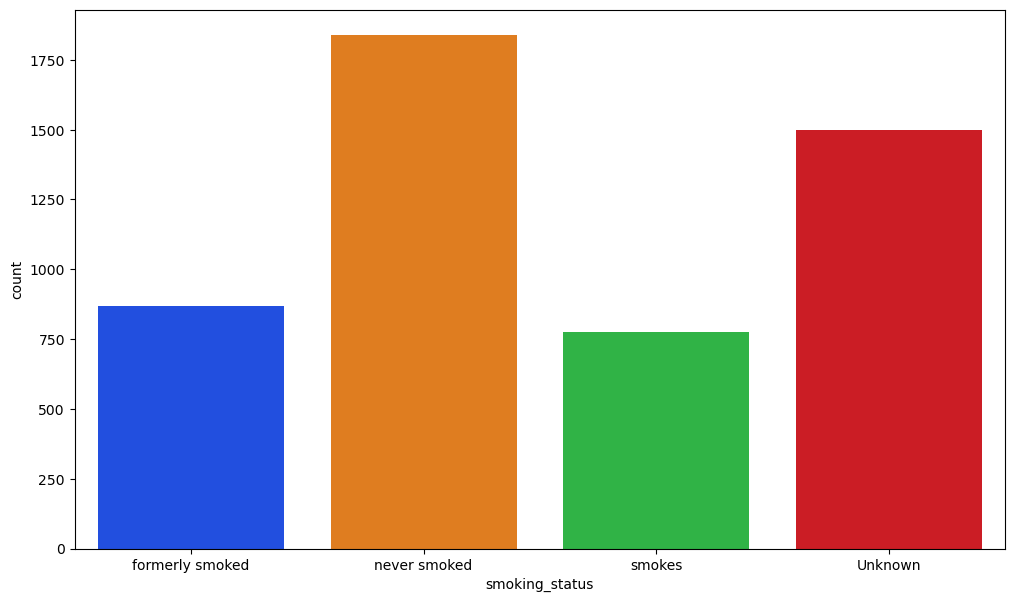

In [6]:
plt.figure(figsize=(12,7))
sns.countplot(data=data, x='smoking_status', palette='bright')

Теперь посмотрим распределение людей по месту проживания

<Axes: xlabel='Residence_type', ylabel='count'>

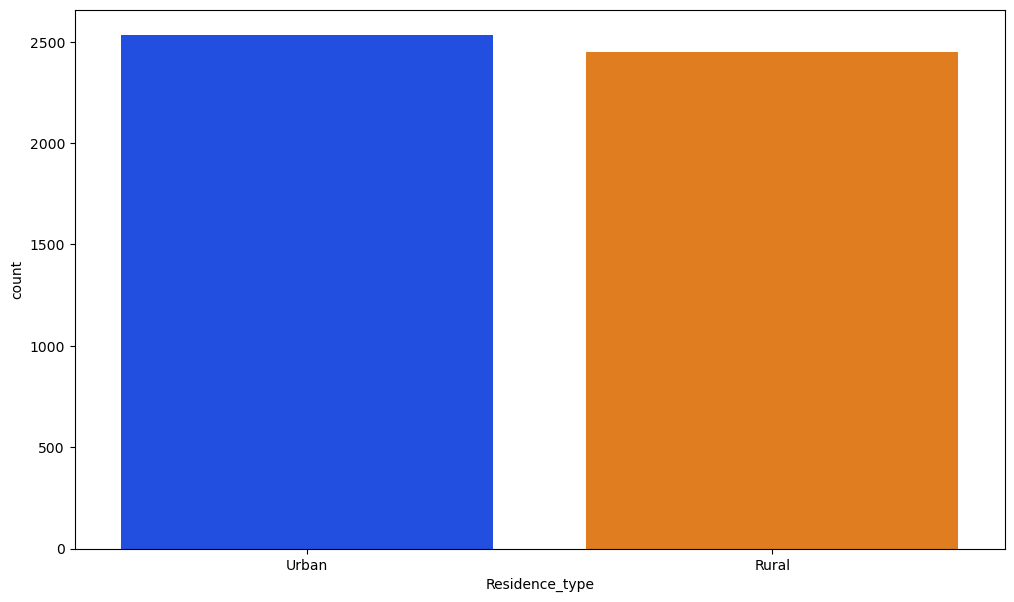

In [7]:
plt.figure(figsize=(12,7))
sns.countplot(data=data, x='Residence_type', palette='bright')

<Axes: xlabel='stroke', ylabel='count'>

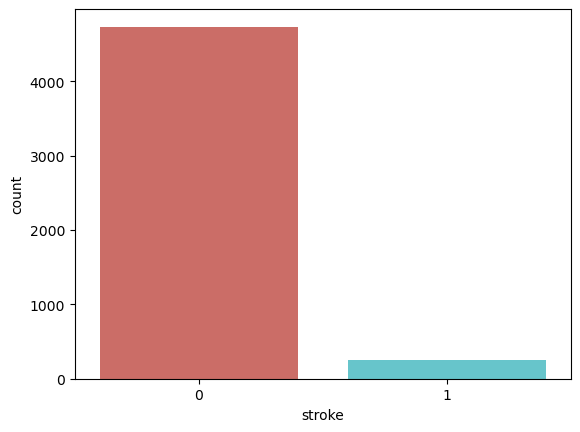

In [8]:
sns.countplot(x='stroke', data=data, palette='hls')

In [9]:
class_0 = len(data[data['stroke']==0])
class_1 = len(data[data['stroke']==1])
class_0,class_1

(4733, 248)

In [10]:
data = data[data['age'] >= 35] # убираем данные, где возраст меньше 35 лет

In [11]:
class_0 = len(data[data['stroke']==0])
class_1 = len(data[data['stroke']==1])
class_0,class_1

(2948, 245)

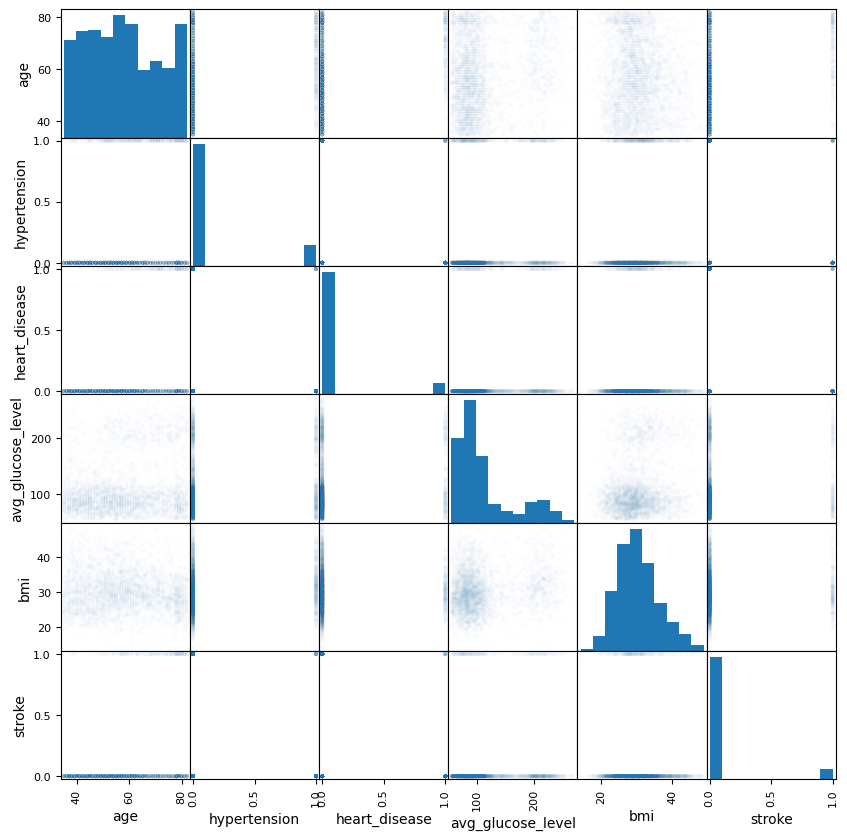

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

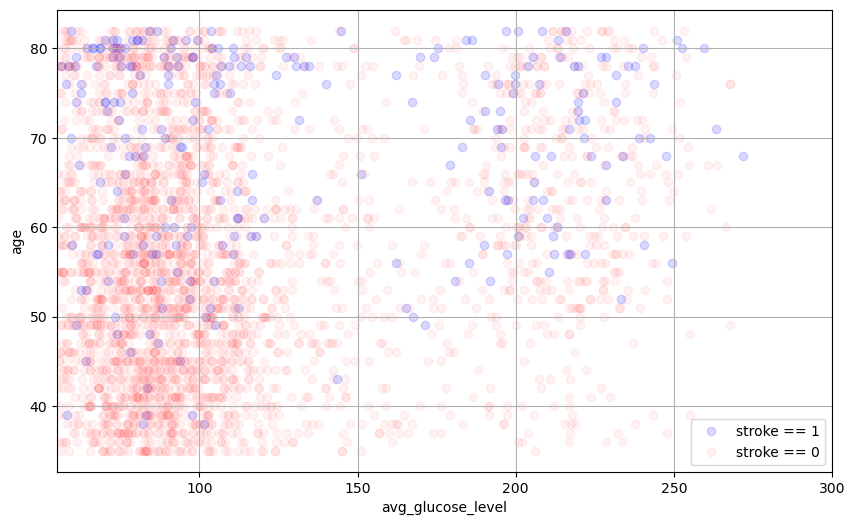

In [13]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['stroke'] == 1]['avg_glucose_level'],
            data[data['stroke'] == 1]['age'],
            alpha = 0.15,
            label = 'stroke == 1',
            color = 'b')

plt.scatter(data[data['stroke'] == 0]['avg_glucose_level'],
            data[data['stroke'] == 0]['age'],
            alpha = 0.05,
            label = 'stroke == 0',
            color = 'r')

plt.xlabel('avg_glucose_level')
plt.xlim(55, 300)
plt.ylabel('age')
plt.legend()
plt.grid()

# Готовим данные

In [14]:
data = data.astype({'age': np.int32})

In [15]:
data.loc[(data.gender == 'Male'), 'gender'] = 0
data.loc[(data.gender == 'Female'), 'gender'] = 1

In [16]:
data.loc[(data.ever_married == 'Yes'), 'ever_married'] = 1
data.loc[(data.ever_married == 'No'), 'ever_married'] = 0

In [17]:
data.loc[(data.Residence_type == 'Urban'), 'Residence_type'] = 1
data.loc[(data.Residence_type == 'Rural'), 'Residence_type'] = 0

In [18]:
data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [19]:
data.loc[(data.smoking_status == 'formerly smoked'), 'smoking_status'] = 1
data.loc[(data.smoking_status == 'never smoked'), 'smoking_status'] = 2
data.loc[(data.smoking_status == 'smokes'), 'smoking_status'] = 3
data.loc[(data.smoking_status == 'Unknown'), 'smoking_status'] = 0

In [20]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job'], dtype=object)

In [21]:
data.loc[(data.work_type == 'Private'), 'work_type'] = 1
data.loc[(data.work_type == 'Self-employed'), 'work_type'] = 2
data.loc[(data.work_type == 'Govt_job'), 'work_type'] = 3

In [22]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67,0,1,1,1,1,228.69,36.6,1,1
1,0,80,0,1,1,1,0,105.92,32.5,2,1
2,1,49,0,0,1,1,1,171.23,34.4,3,1
3,1,79,1,0,1,2,0,174.12,24.0,2,1
4,0,81,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,0,41,0,0,0,1,0,70.15,29.8,1,0
4977,0,40,0,0,1,1,1,191.15,31.1,3,0
4978,1,45,1,0,1,3,0,95.02,31.8,3,0
4979,0,40,0,0,1,1,0,83.94,30.0,3,0


Так как теперь все данные числовые, мы можем построить корреляционную матрицу

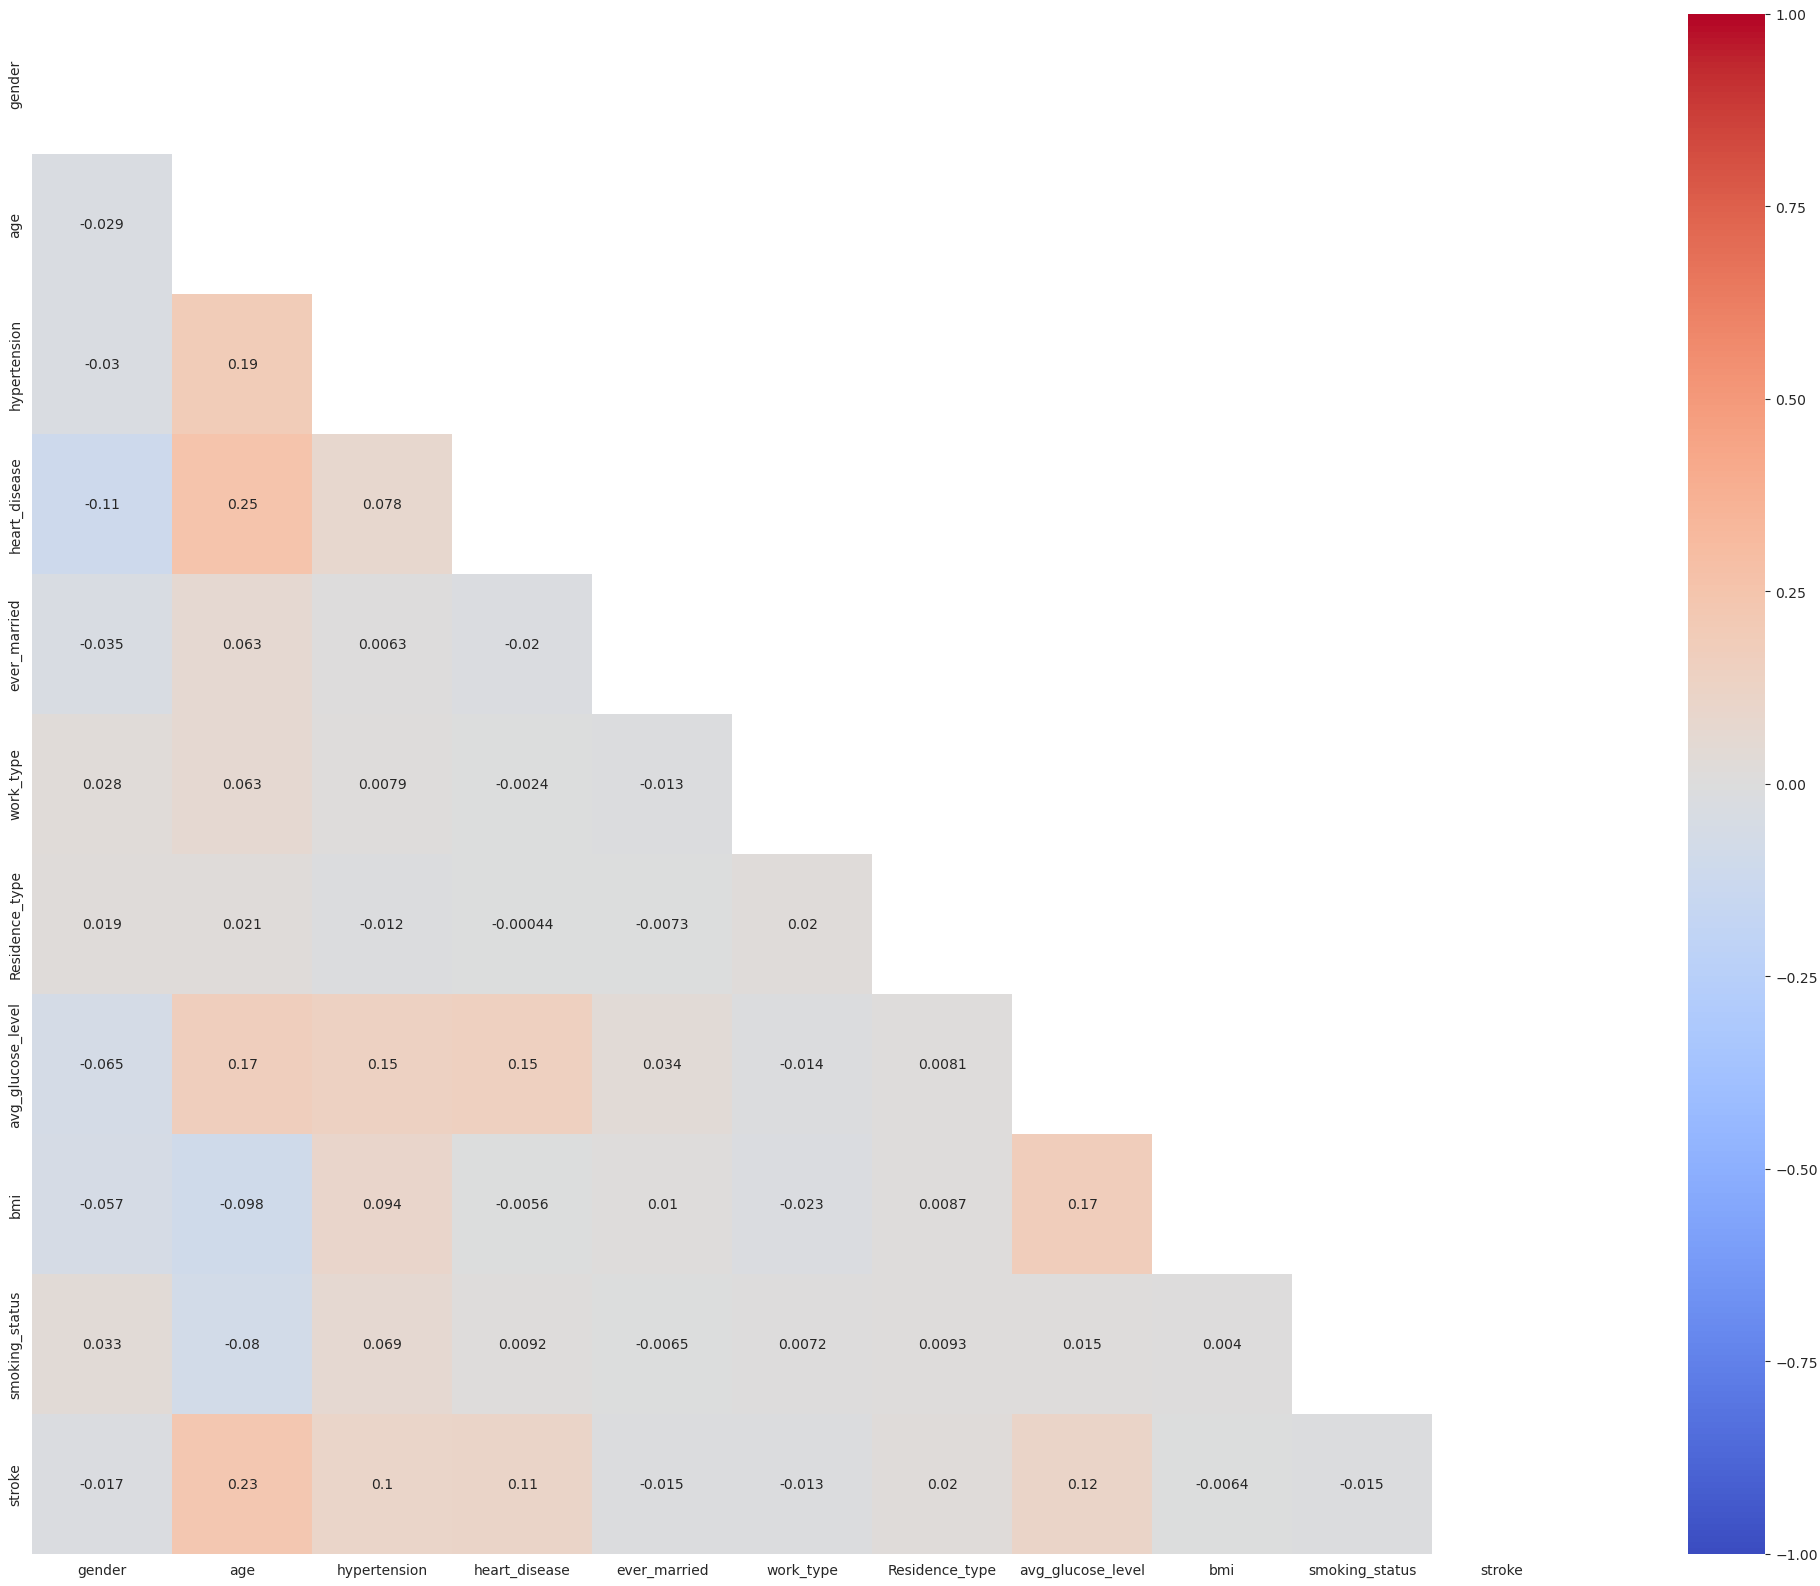

In [23]:
corr_matrix = data.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30,20))
    sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='coolwarm', annot=True, mask=mask, square=True)

<Axes: xlabel='stroke', ylabel='count'>

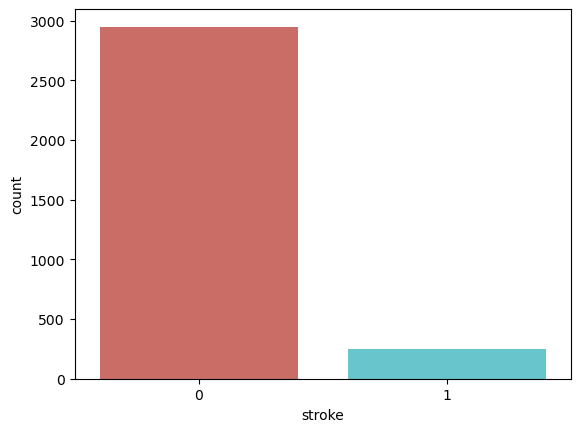

In [24]:
sns.countplot(x='stroke', data=data, palette='hls') #имеем сильно неравное распределение по классам

In [25]:
count_0 = len(data[data['stroke']==0])
count_1 = len(data[data['stroke']==1])
pct_of_0 = count_0 / (count_0+count_1)
print("Нет заболевание: ", pct_of_0*100)
pct_of_1 = count_1/(count_0+count_1)
print("Есть заболевания: ", pct_of_1*100)

Нет заболевание:  92.32696523645475
Есть заболевания:  7.673034763545256


# X и y

In [26]:
X = data.drop('stroke', axis = 1) # выбрасываем столбец 'stroke'
y = data['stroke']

In [27]:
X = X.to_numpy()
y = np.array(y)

In [28]:
print(X.shape)
print(y.shape)
N, d = X.shape

(3193, 10)
(3193,)


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 777)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

print(N_train, N_test)

2235 958


# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

1.0

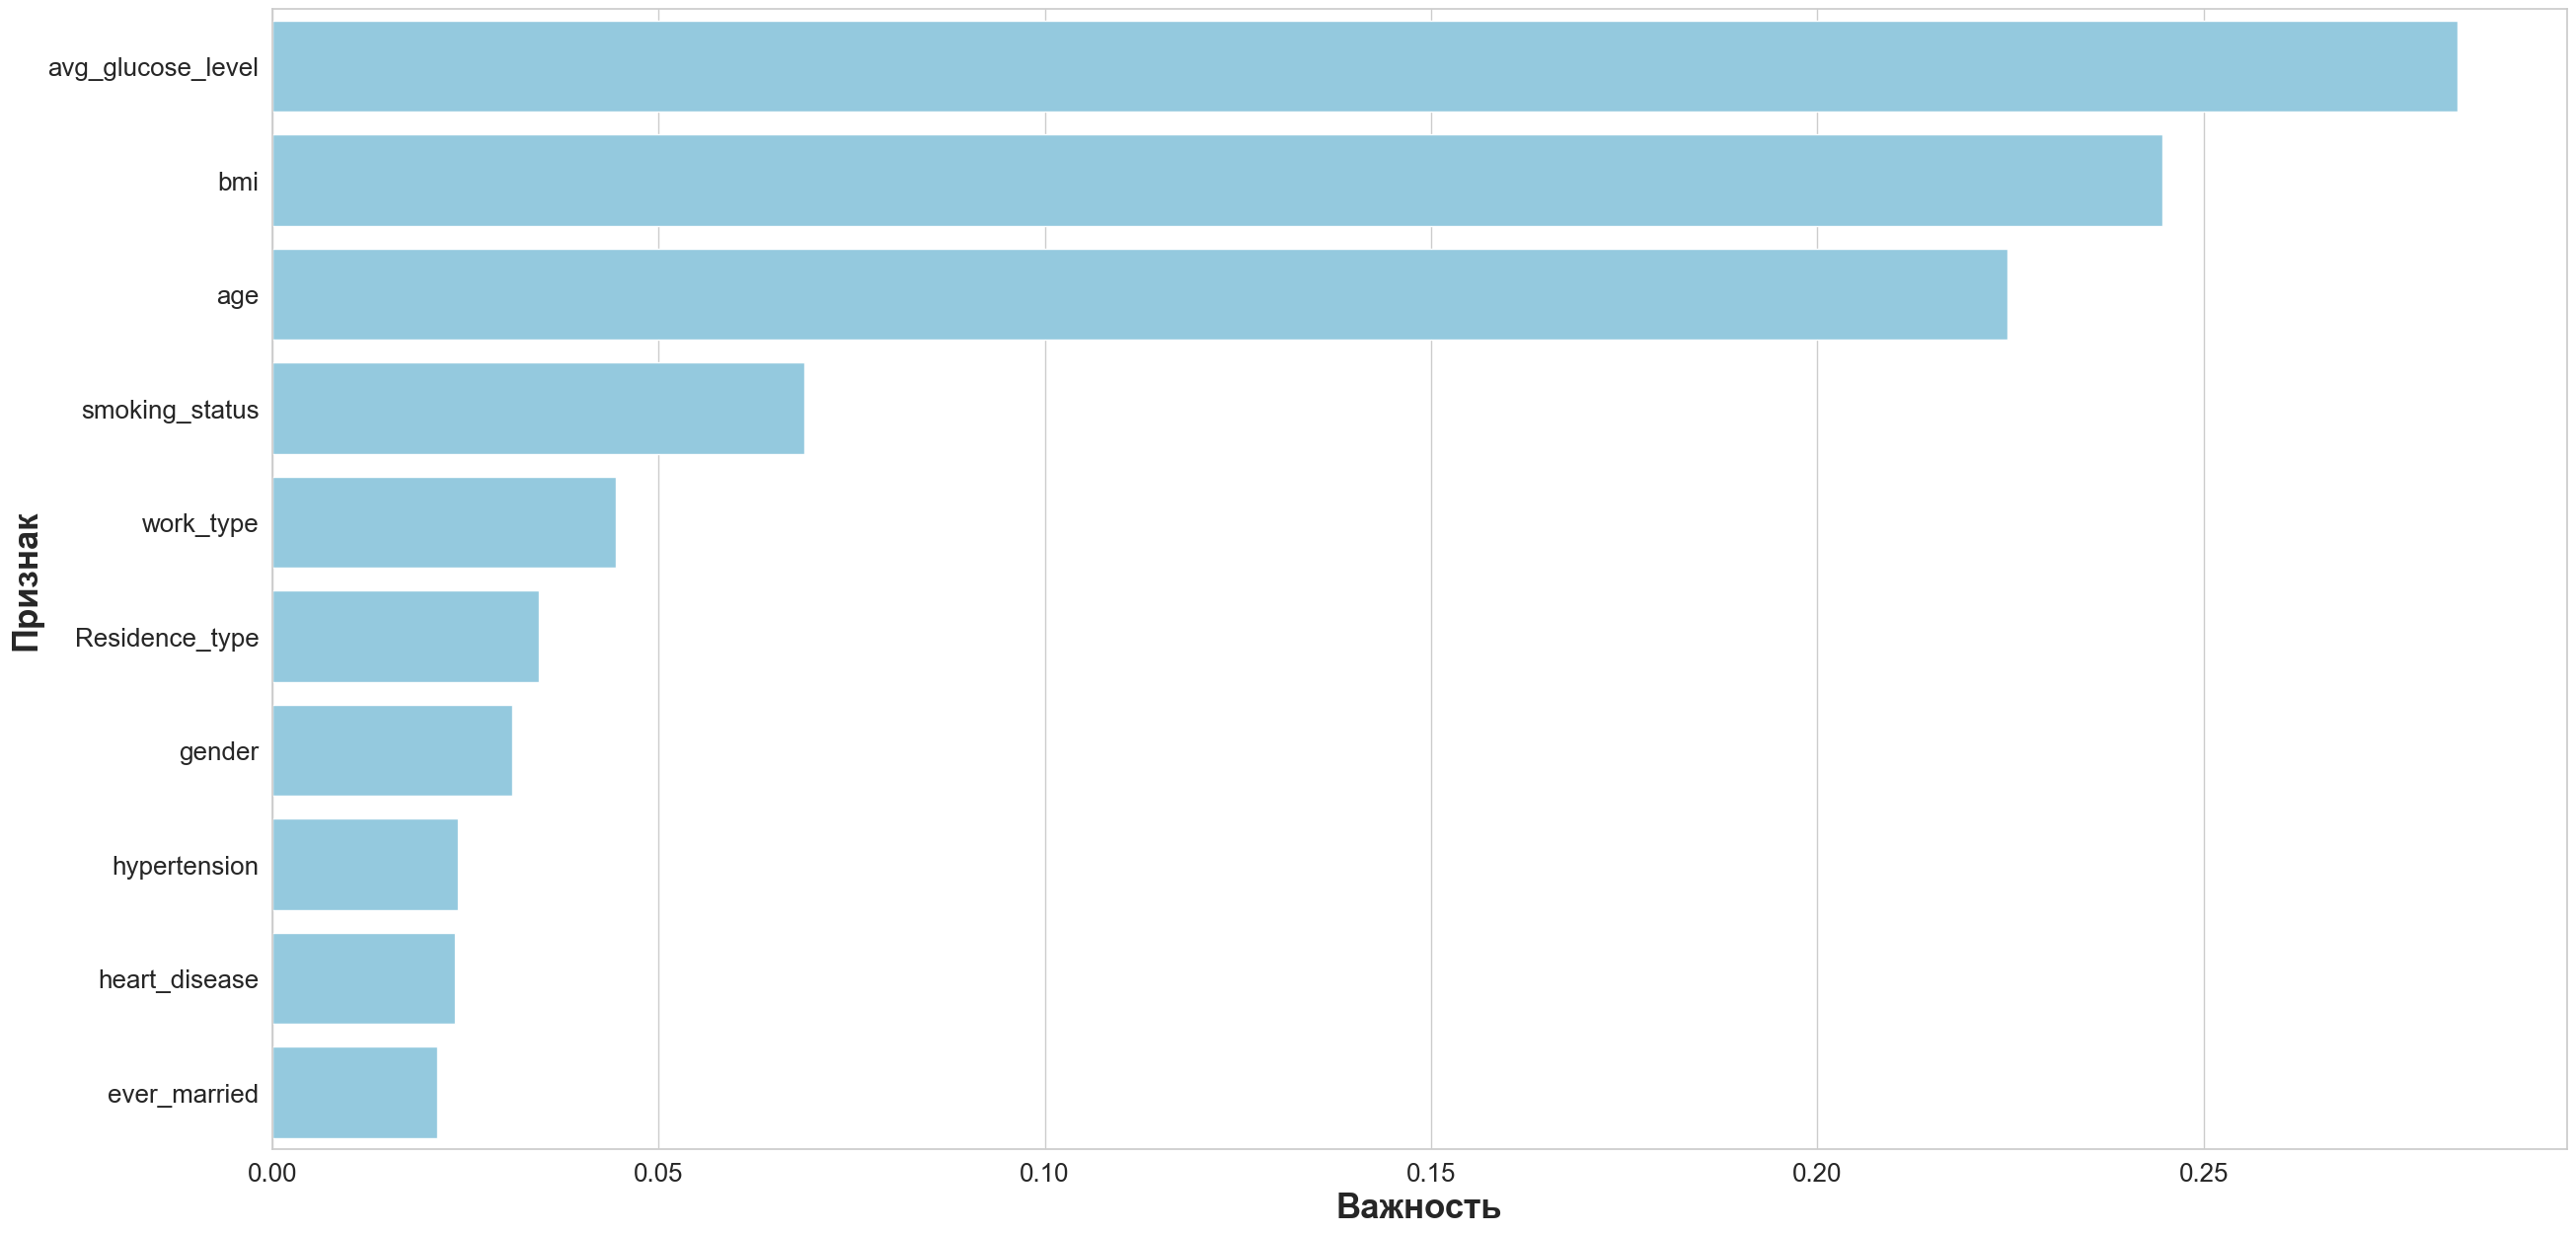

None

,Признак,Процент важности
0,avg_glucose_level,0.282871
1,bmi,0.244615
2,age,0.224600
3,smoking_status,0.068872
4,work_type,0.044425
5,Residence_type,0.034469
6,gender,0.031020
7,hypertension,0.024029
8,heart_disease,0.023721
9,ever_married,0.021378


In [31]:
feats = {}
for feature, importance in zip(data.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Процент важности'})
importances = importances.sort_values(by='Процент важности', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Признак'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Процент важности'], y=importances['Признак'], data=importances, color='skyblue')
plt.xlabel('Важность', fontsize=25, weight = 'bold')
plt.ylabel('Признак', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

# Заметим, что наиболее важными признаками для классификации оказались: уровень сахара в крови, индекс массы тела и возраст

Оценим результаты

In [32]:
error_train = np.mean(y_train != rfc.predict(X_train))
error_test  = np.mean(y_test  != rfc.predict(X_test))
print('Error on train = ', error_train)
print('Error on test = ', error_test)

Error on train =  0.0
Error on test =  0.08559498956158663


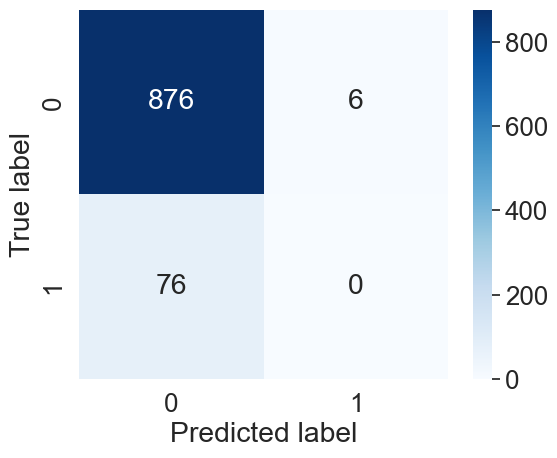

In [33]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, rfc.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass

# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

g = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 30)}).fit(X_train, y_train)

print('Ошибка : ', 1 - g.best_score_)
print('Оптимальное количество соседей: ', g.best_estimator_.n_neighbors)

Ошибка :  0.07561521252796433
Оптимальное количество соседей:  12


In [39]:
knn = KNeighborsClassifier(n_neighbors = g.best_estimator_.n_neighbors).fit(X_train, y_train)

print(f"Ошибка на обучающей выборке: {np.mean(y_train != knn.predict(X_train))}")
print(f"Ошибка на тестовой выборке: {np.mean(y_test != knn.predict(X_test))}")

Ошибка на обучающей выборке: 0.0756152125279642
Ошибка на тестовой выборке: 0.07933194154488518


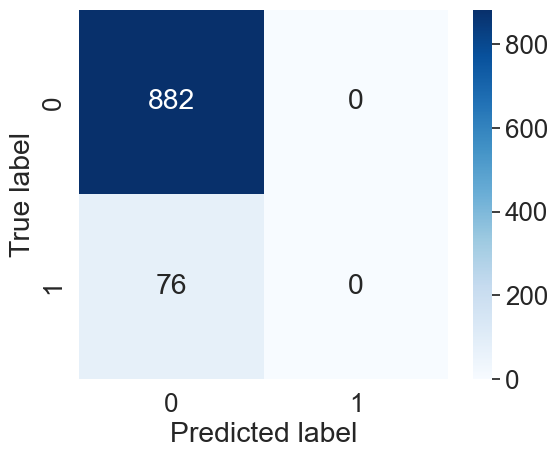

In [41]:
sns.heatmap(confusion_matrix(y_test, knn.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass

# Попробуем сбалансировать классы и повторить исследование

In [42]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

<Axes: title={'center': 'Распределение классов после SMOTE'}, xlabel='stroke'>

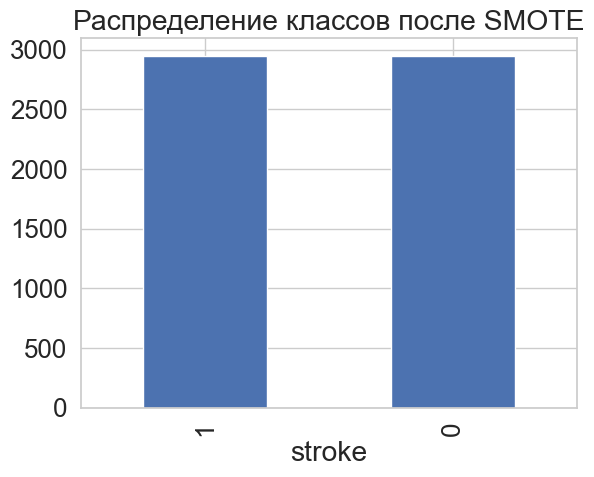

In [43]:
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Распределение классов после SMOTE', xlabel='stroke')

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 777)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

print(N_train, N_test)

4127 1769


# Переделаем модели и сравним данные

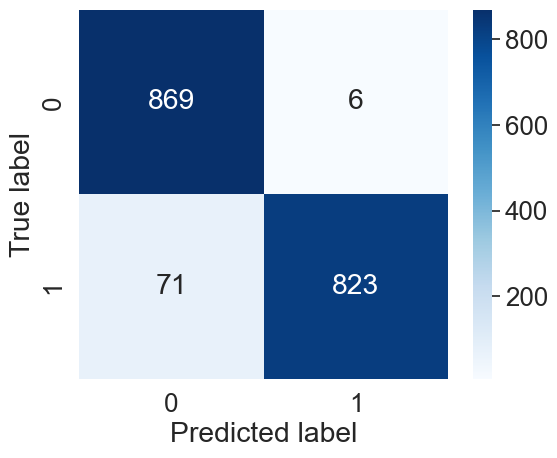

In [45]:
rfc_new = RandomForestClassifier()
rfc_new.fit(X_train, y_train)

sns.heatmap(confusion_matrix(y_test, rfc_new.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass

In [47]:
error_train = np.mean(y_train != rfc.predict(X_train))
error_test  = np.mean(y_test  != rfc.predict(X_test))
print('Ошибка на обучающей выборке = ', error_train)
print('Ошибка на тестовой выборке = ', error_test)

Ошибка на обучающей выборке =  0.31427186818512237
Ошибка на тестовой выборке =  0.33465234595816845


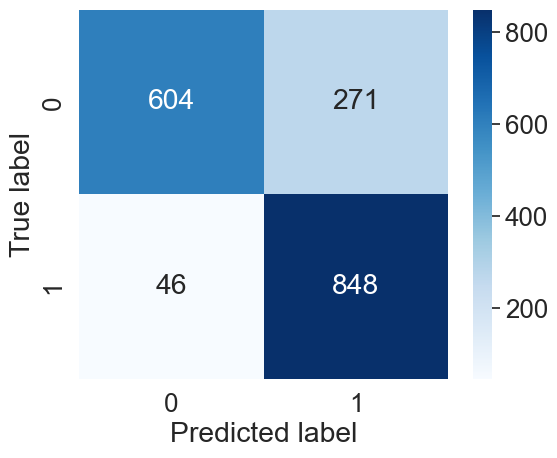

In [48]:
knn_new = KNeighborsClassifier(n_neighbors = 12)
knn_new.fit(X_train, y_train)

sns.heatmap(confusion_matrix(y_test, knn_new.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass

In [49]:
error_train = np.mean(y_train != knn.predict(X_train))
error_test  = np.mean(y_test  != knn.predict(X_test))
print('Error on train = ', error_train)
print('Error on test = ', error_test)

Error on train =  0.49745577901623456
Error on test =  0.5048049745618994


Можно сделать вывод, что с данной задачей классификации лучше справилась модель Ramdom Forest (по ошибкам на тестовой и тренировочной выборках: 31,4% - error train в RFC, 33,5% - error test в RFC, против 49,6% и 50,5% соответственно.